# Exploratory Data Analysis

### 1. Motivation and Goal
...

### 2. Imports / Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './data/glacier_data.csv'
df = pd.read_csv(filepath_or_buffer=file_path)

In [3]:
df.head()

,Unnamed: 0,ID,Major_RGI_Region,Mountain_range_Region,Country,Glacier,RGI_Glacier_Area,Lake,Lake_type,Longitude,...,Perimeter_before,Image_date_before,Satellite_before,Certainty_level_before,Lake_area_after,Perimeter_after,Image_date_after,Satellite_after,Certainty_level_after,Year
0,2,1.0,unknown,unknown,Greenland,NaN,238.201,Iluliallup Tasersua,ice,-51.815633,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,NaN
1,3,2.0,unknown,unknown,Greenland,Sermilik Bræ,NaN,Imaersartoq,ice,-48.454648,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,NaN
2,4,3.0,unknown,unknown,Greenland,Sermiligårssuk Bræ,NaN,North Midternæs temporary lake,ice,-47.965525,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,NaN
3,5,4.0,unknown,unknown,Greenland,Sermilik Bræ,NaN,Imaersartoq,ice,-48.454648,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,NaN
4,6,5.0,unknown,unknown,Greenland,Sermiligårssuk Bræ,NaN,North Midternæs temporary lake,ice,-47.965525,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,NaN


In [6]:
df[df.Year < 1400]

,Unnamed: 0,ID,Major_RGI_Region,Mountain_range_Region,Country,Glacier,RGI_Glacier_Area,Lake,Lake_type,Longitude,...,Perimeter_before,Image_date_before,Satellite_before,Certainty_level_before,Lake_area_after,Perimeter_after,Image_date_after,Satellite_after,Certainty_level_after,Year
2718,6,5.0,Iceland,Iceland,Iceland,Skeiðarárjökull,1561.218,Grænalón,ice,-17.34175,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,1201.0
2721,9,8.0,Iceland,Iceland,Iceland,Mýrdalsjökull,145.022,Kötluaskjan,ice – volc,-19.15000,...,NaN,NaN,unknown,0.0,NaN,NaN,NaN,unknown,0.0,1311.0


In [7]:
df = df.drop(columns=['Unnamed: 0'])

### 3. Exploratory Data Analysis

In [8]:
# Number of observations
print('Length of Dataset:', len(df))

Length of Dataset: 3457


In [9]:
# Descriptive statistics
df.describe()

,ID,RGI_Glacier_Area,Longitude,Latitude,Mean_Flood_Volume_V0,Peak_discharge_Qp,First_reference_found,Lake_area_before,Perimeter_before,Certainty_level_before,Lake_area_after,Perimeter_after,Certainty_level_after,Year
count,3457.000000,2701.000000,3368.000000,3368.000000,886.000000,808.000000,2953.000000,4.660000e+02,425.000000,3457.000000,4.150000e+02,392.000000,3457.000000,2664.000000
mean,258.500434,242.850960,-35.975790,46.461140,260.889938,3131.575451,1986.821199,4.329205e+06,10643.327059,0.241539,2.554558e+06,4906.650510,0.200463,1961.178303
std,201.351313,380.238047,74.483118,28.928289,1003.496858,16769.493951,33.856112,1.876260e+07,21172.873961,0.631291,1.682949e+07,18938.311463,0.567258,71.911455
min,1.000000,0.036000,-152.589798,-54.823635,0.000300,0.200000,1818.000000,4.282000e+03,241.000000,0.000000,0.000000e+00,0.000000,0.000000,1201.000000
25%,93.000000,10.889000,-77.645486,43.018981,2.482500,200.000000,1970.000000,2.170028e+05,3032.000000,0.000000,0.000000e+00,0.000000,0.000000,1946.000000
50%,209.000000,93.266000,-19.230142,58.878526,28.600000,650.000000,1994.000000,9.507210e+05,6398.000000,0.000000,1.386500e+04,639.000000,0.000000,1980.000000
75%,393.000000,292.531000,7.820855,63.630000,151.967364,1742.500000,2015.000000,2.672690e+06,11372.000000,0.000000,2.769700e+05,3113.750000,0.000000,2005.000000
max,833.000000,2834.493000,175.564026,77.684225,22500.000000,300000.000000,2022.000000,2.160303e+08,223882.000000,2.000000,1.917061e+08,181801.000000,2.000000,2022.000000


Text(0.5, 1.0, 'Number of GLOFs per Year (All Observations)')

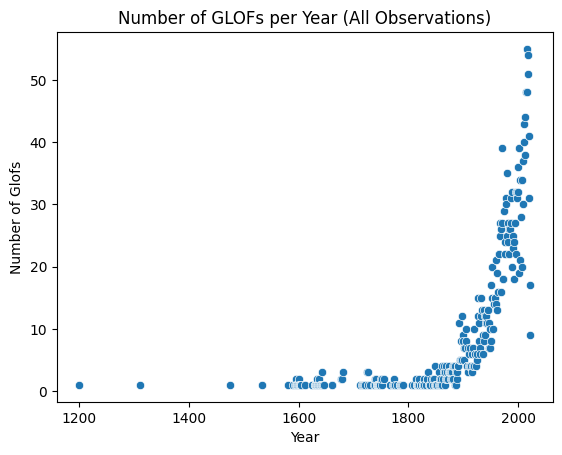

In [10]:
# Get the number GLOFs / year and plot
glofs_per_year = df.groupby(by='Year')[['ID']].count().rename(columns={'ID': 'GLOFs'}).reset_index()
sns.scatterplot(data=glofs_per_year, x='Year', y='GLOFs')
plt.ylabel('Number of Glofs')
plt.title('Number of GLOFs per Year (All Observations)')

**Comment:** We seem to have some very old observations, let's view the observations from only the 1800:s and forward where most of the observations are. 

Text(0.5, 1.0, 'Number of GLOFs per Year (Year 1800 and forward)')

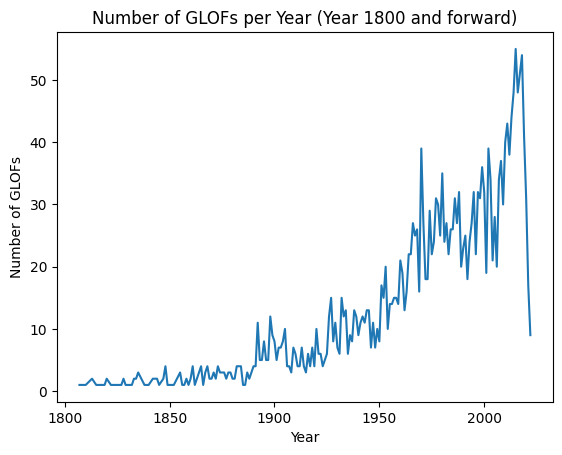

In [27]:
sns.lineplot(data=glofs_per_year[glofs_per_year.Year >= 1800], x='Year', y='GLOFs')
plt.ylabel('Number of GLOFs')
plt.title('Number of GLOFs per Year (Year 1800 and forward)')

**Comment:** The number of observed GLOFs seem to be rising since the 1800:s. There is an interesting spike around the year of 1960. We can also see clearly that the data doesn't seem to be complete for the latest year (2022) in the dataset. A downturn that sharp seems unlikely.

#### 3.1 Analysis by Region

Text(0.5, 1.0, 'Number of GLOFs by Region')

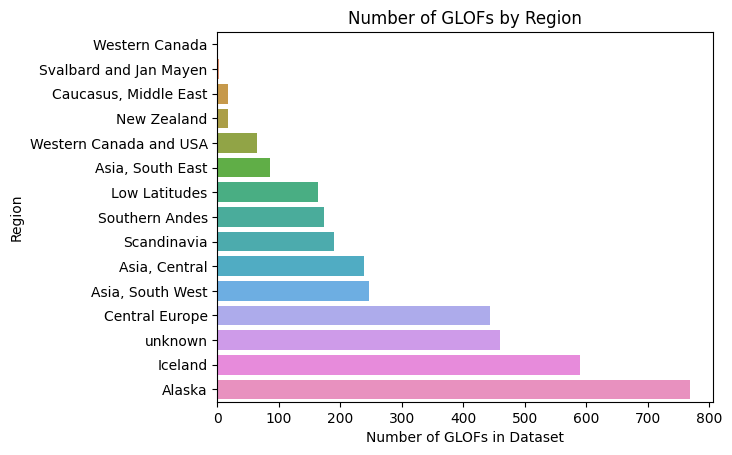

In [39]:
# Barplot of the number of GLOFs by region
glofs_by_area = df.groupby(by='Major_RGI_Region')[['ID']].count().rename(columns={'ID': 'GLOFs'}).reset_index().sort_values(by='GLOFs')
sns.barplot(data=glofs_by_area, x='GLOFs', y='Major_RGI_Region')
plt.xlabel('Number of GLOFs in Dataset')
plt.ylabel('Region')
plt.title('Number of GLOFs by Region')

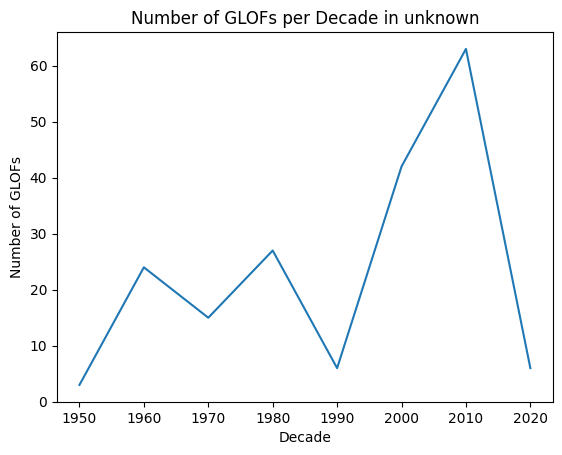

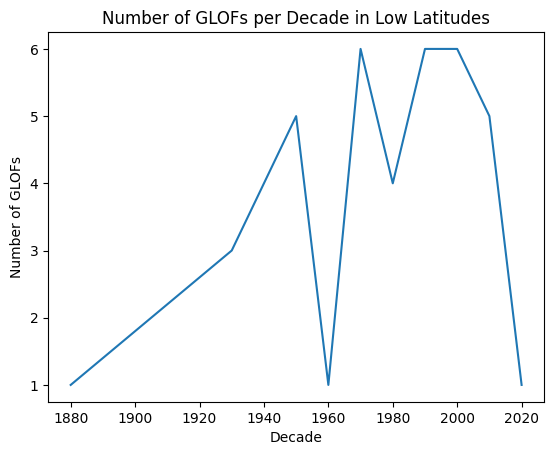

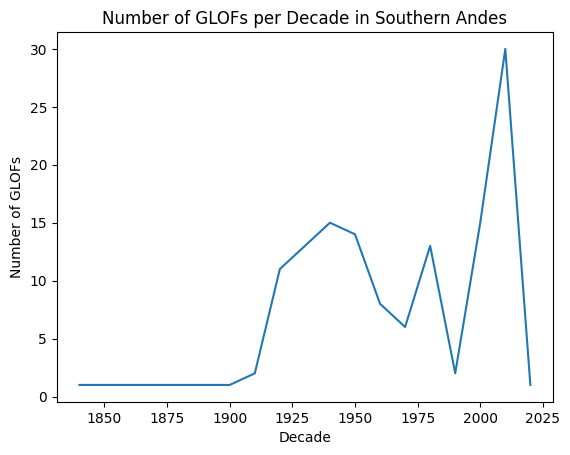

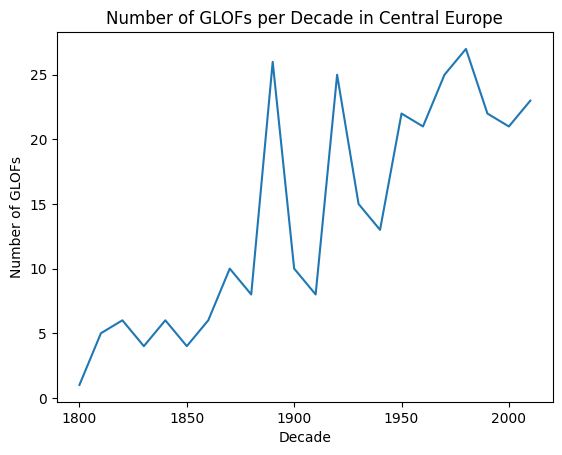

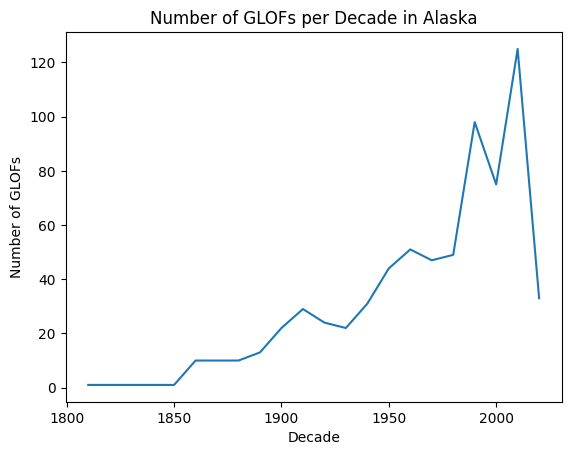

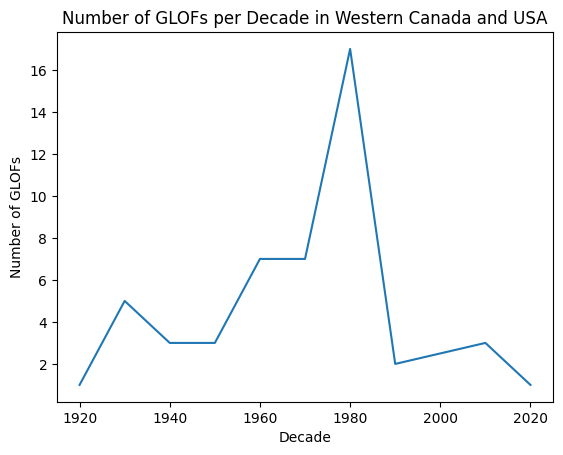

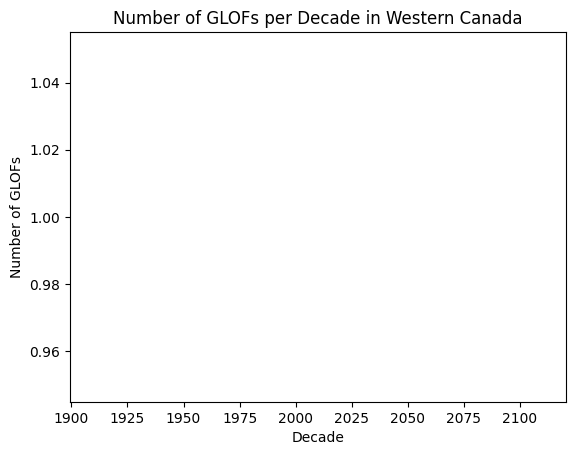

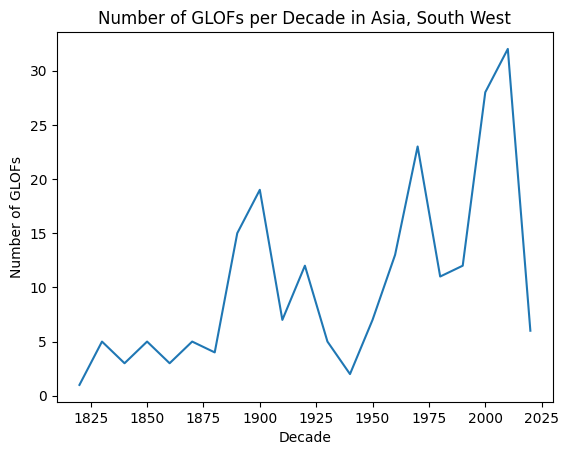

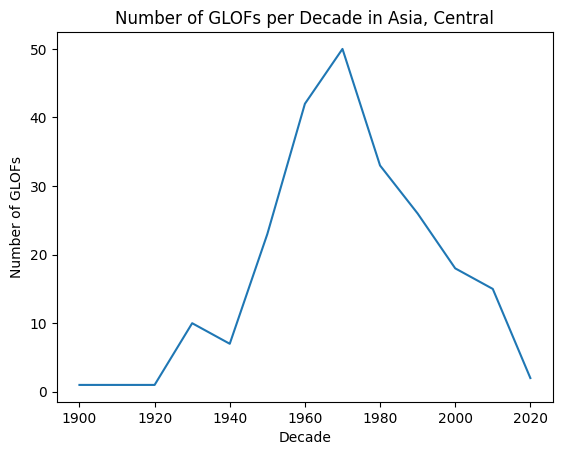

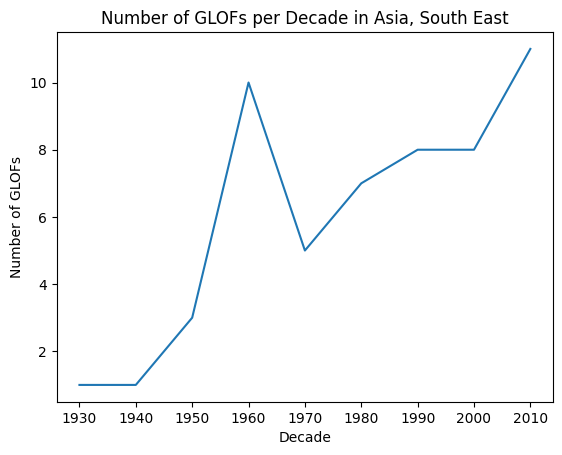

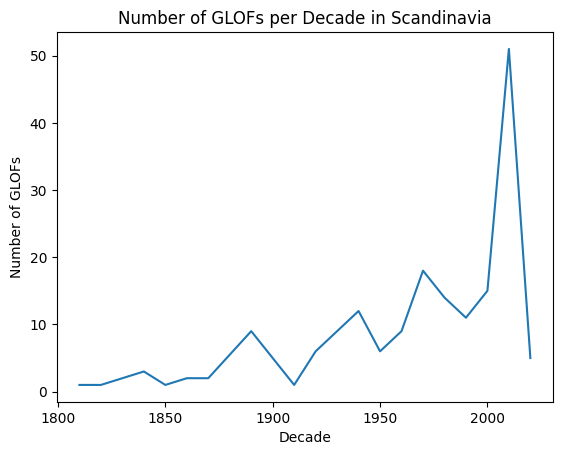

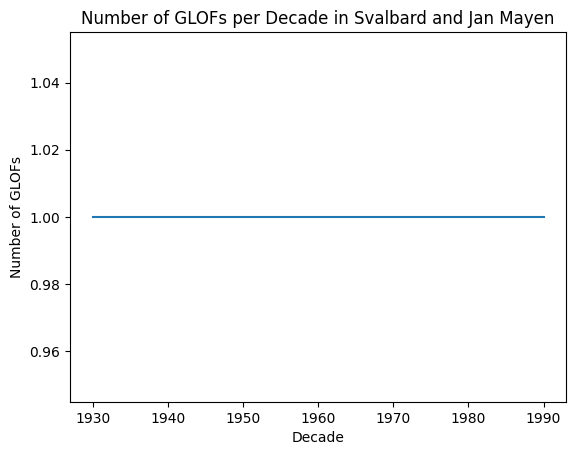

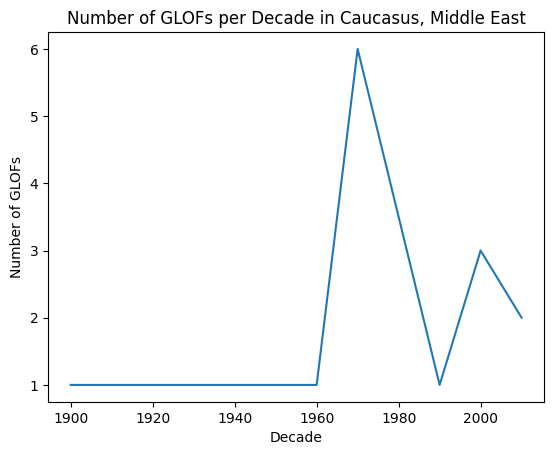

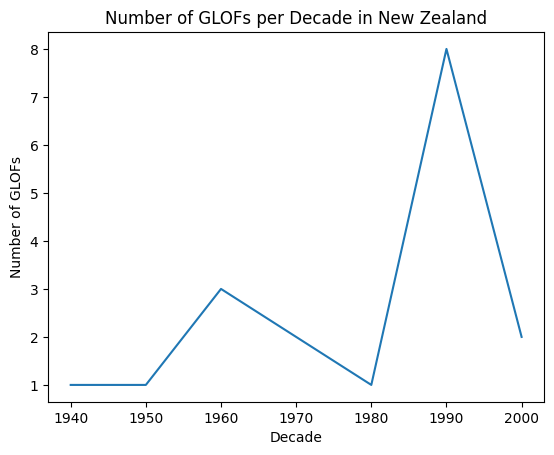

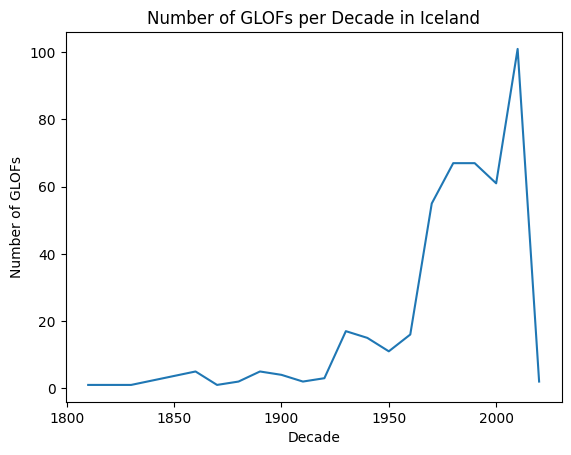

In [44]:
# Get the number of GLOFs / year + Group by Area and plot
# group by decade because there are too few observations per year and region
# by decade gives a more clear overview
for area in df.Major_RGI_Region.unique():
    glofs_per_year_and_area = df.copy()
    glofs_per_year_and_area['Decade'] = glofs_per_year_and_area['Year'] // 10 * 10
    glofs_per_year_and_area = glofs_per_year_and_area[(glofs_per_year_and_area['Major_RGI_Region'] == area) & (glofs_per_year_and_area['Year'] >= 1800)].groupby(by='Decade')[['ID']].count().rename(columns={'ID': 'GLOFs'}).reset_index()
    sns.lineplot(data=glofs_per_year_and_area, x='Decade', y='GLOFs')
    plt.title(f'Number of GLOFs per Decade in {area}')
    plt.ylabel('Number of GLOFs')
    plt.show()

**Comment:** From the barplot we can see that the number of recorded GLOFs varies greatly between different region. Most recorded GLOFs in the dataset are from Alaska and Iceland. The lineplots show us the number of GLOFs per decade and for most regions, the number of recorded GLOFs seems to increase. There are however a few exceptions from this trend such as "Asia Central", "Western Canada and USA" and "Caucasus, Middle East" where there appears to have been a peak in the number of GLOFs. For "Caucasus, Middle East", there are very few observations (GLOFs / decade peaks at 6) so we shouldn't read too much into that. 

#### 3.2 Analysis by Lake type

Text(0.5, 1.0, 'Number of GLOFs by Region')

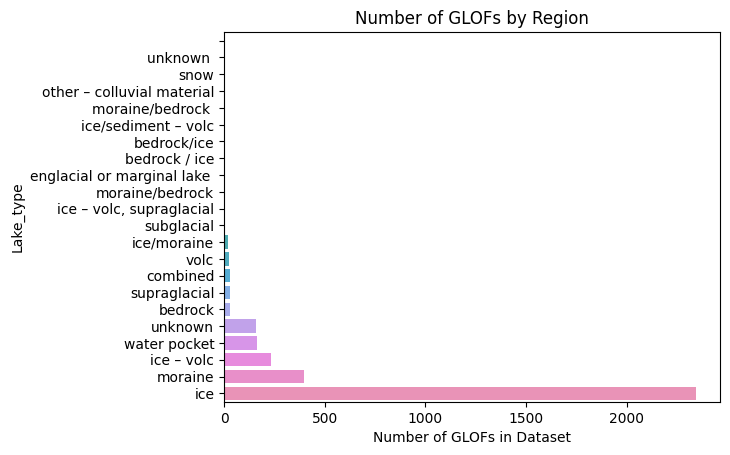

In [46]:
# Barplot of the number of GLOFs by Lake type
glofs_by_lake_type = df.groupby(by='Lake_type')[['ID']].count().rename(columns={'ID': 'GLOFs'}).reset_index().sort_values(by='GLOFs')
sns.barplot(data=glofs_by_area, x='GLOFs', y='Lake_type')
plt.xlabel('Number of GLOFs in Dataset')
plt.ylabel('Lake_type')
plt.title('Number of GLOFs by Region')

**Comment:** Lake type "ice" seems to be the most common by far. Let's also view the less common lake types more in detail.

Text(0.5, 1.0, 'Number of GLOFs by Lake Type')

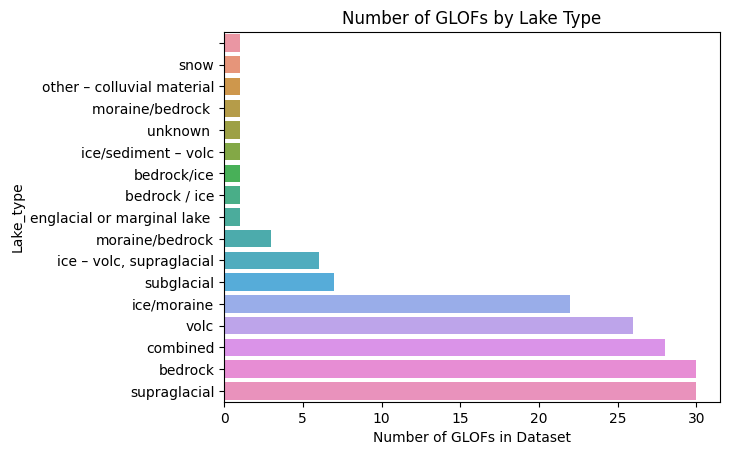

In [56]:
# Plot the same thing without the 5 dominating Lake types
glofs_by_lake_type2 = df[~df.Lake_type.isin(['ice', 'moraine', 'ice – volc', 'unknown', 'water pocket'])].groupby(by='Lake_type')[['ID']].count().rename(columns={'ID': 'GLOFs'}).reset_index().sort_values(by='GLOFs')
sns.barplot(data=glofs_by_lake_type2, x='GLOFs', y='Lake_type')
plt.xlabel('Number of GLOFs in Dataset')
plt.ylabel('Lake_type')
plt.title('Number of GLOFs by Lake Type')

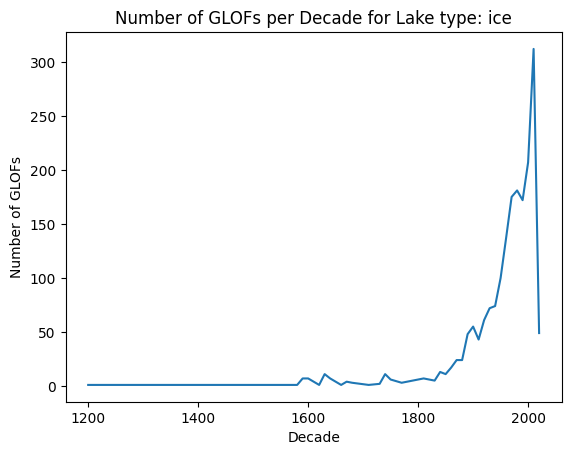

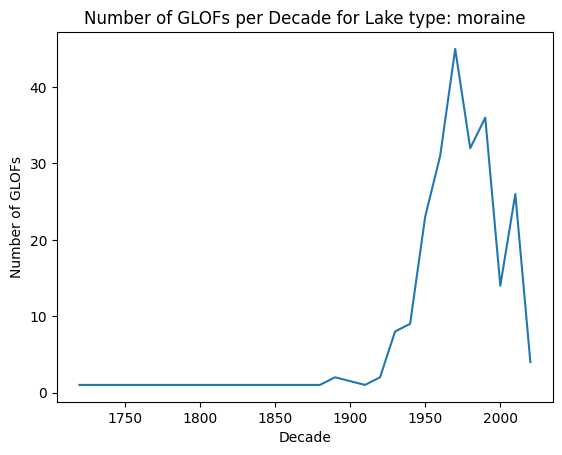

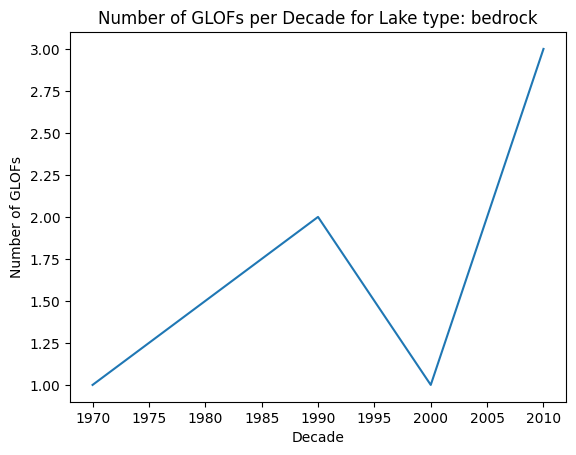

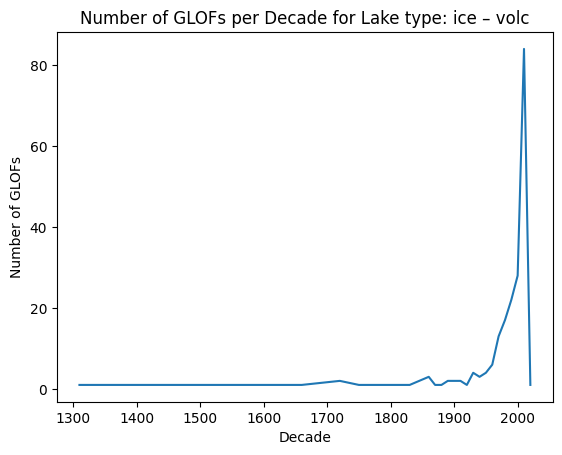

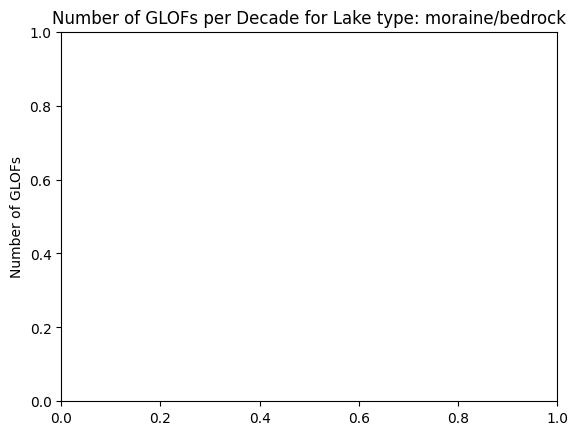

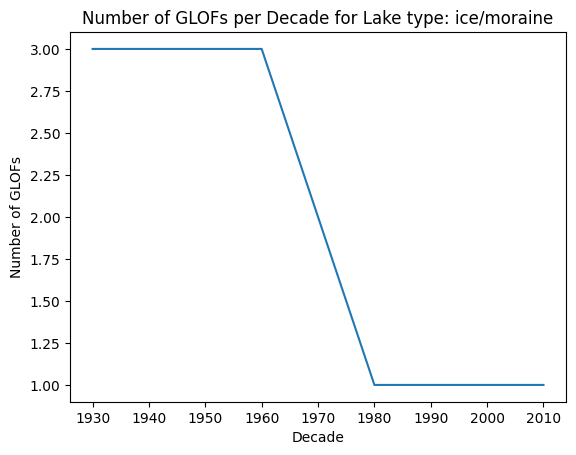

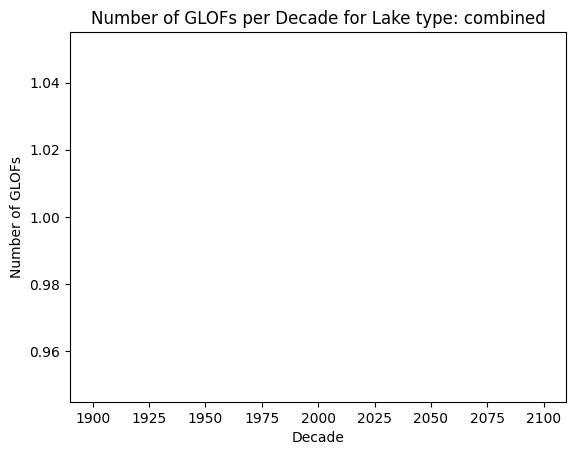

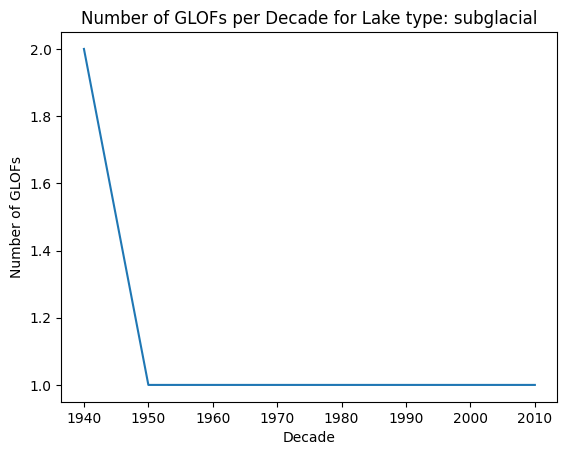

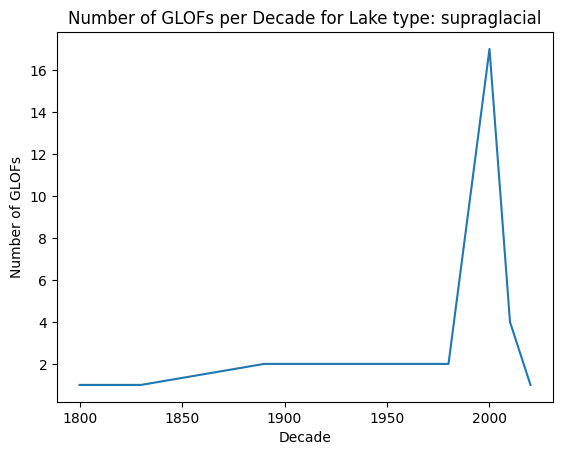

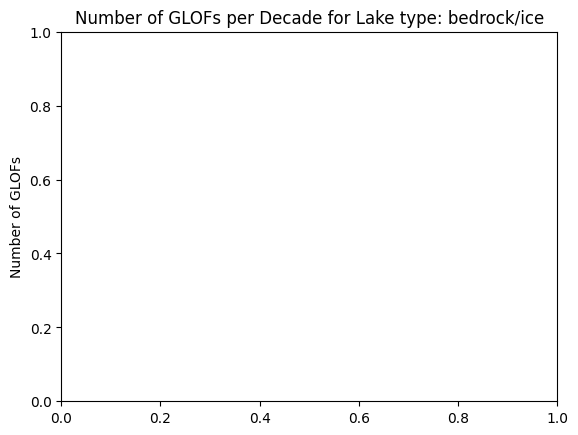

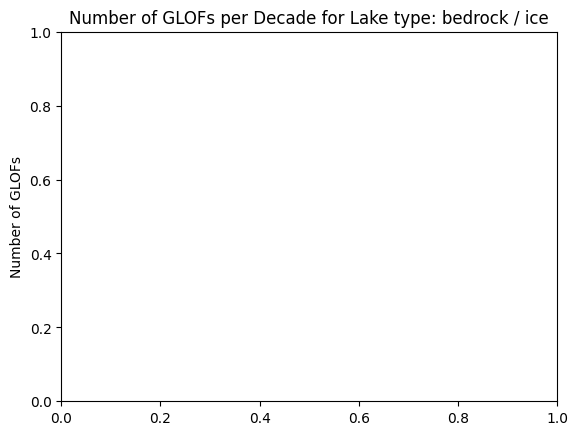

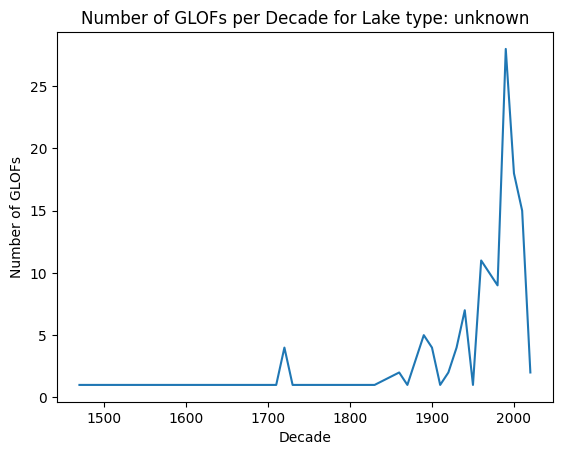

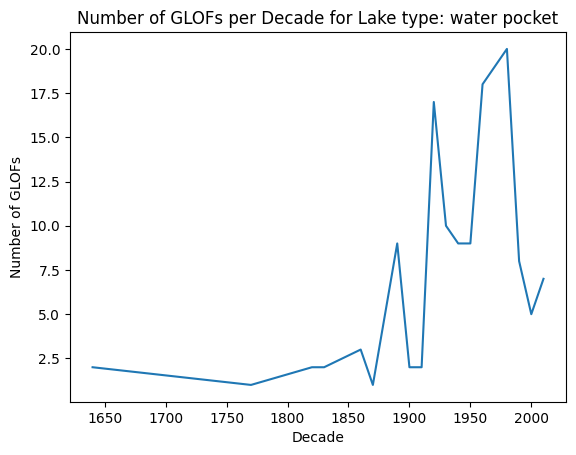

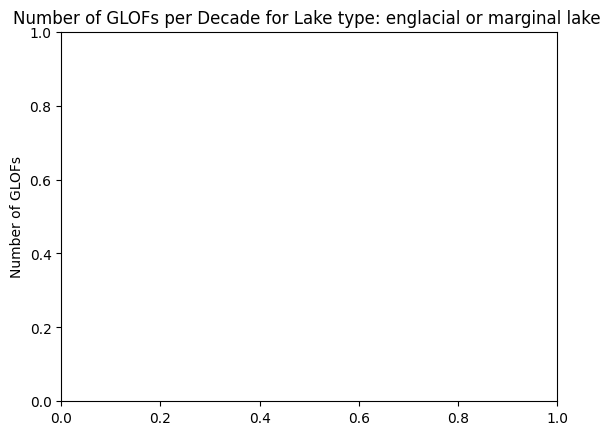

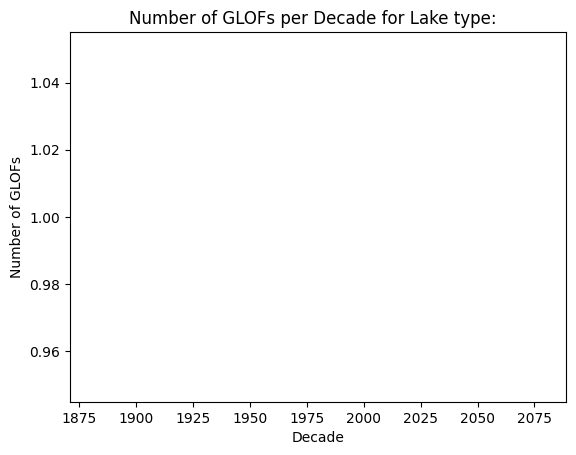

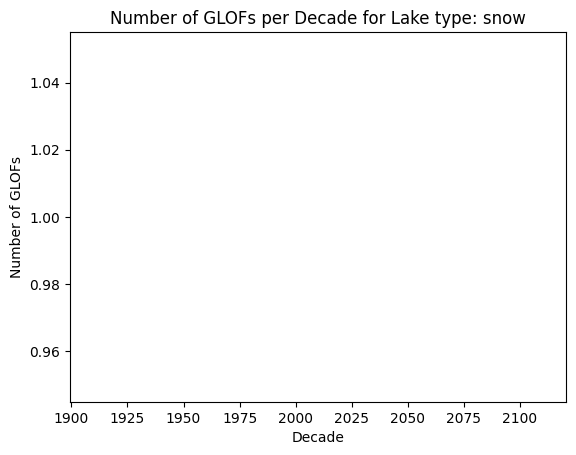

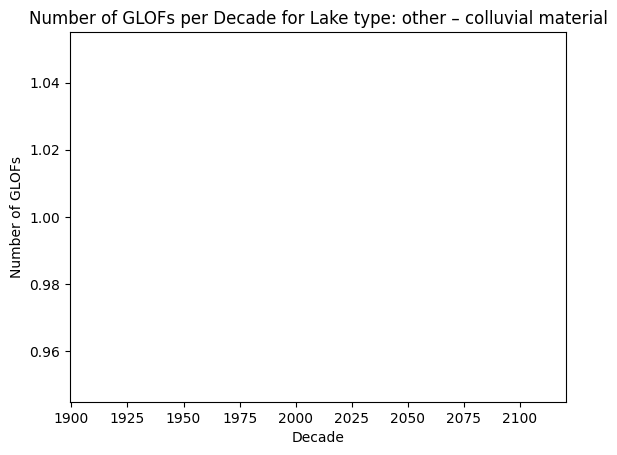

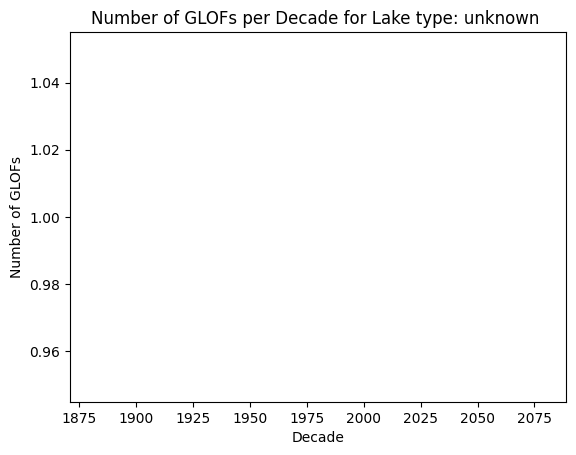

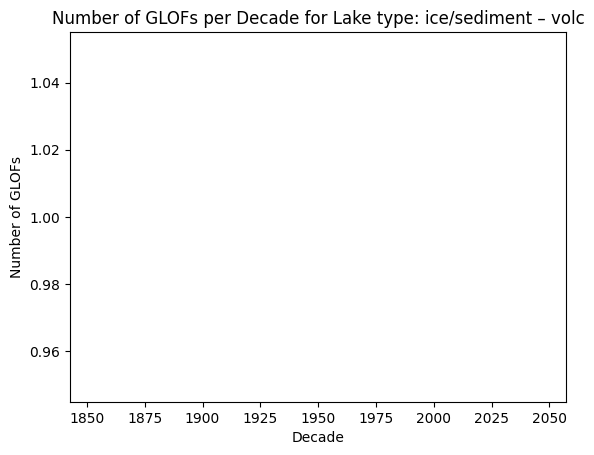

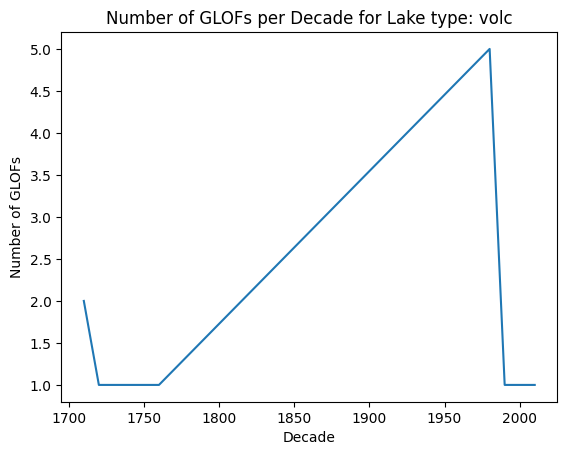

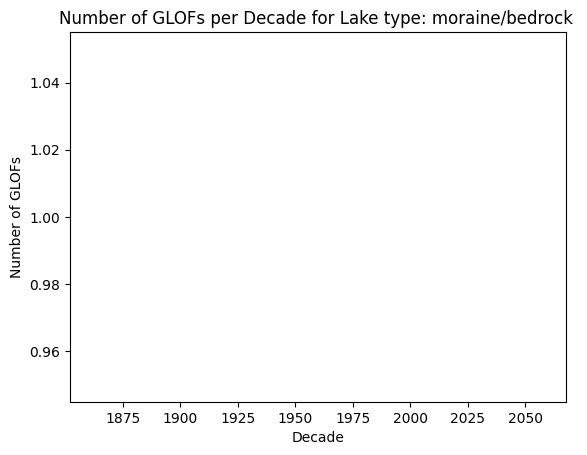

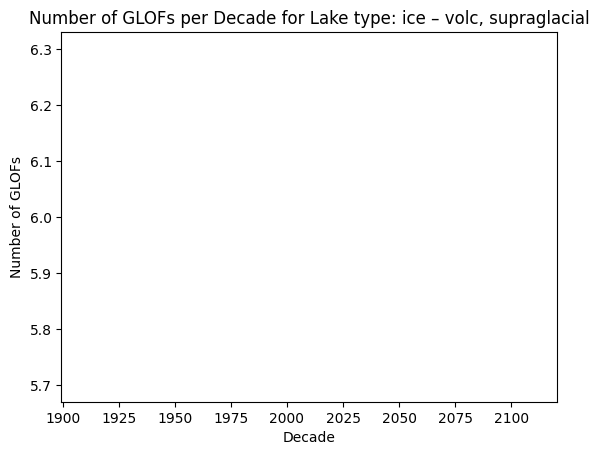

In [59]:
# Get the number of GLOFs / decade + Group by Lake type and plot
# group by decade because there are too few observations per year and lake type
# by decade gives a more clear overview
for lt in df.Lake_type.unique():
    glofs_per_year_and_lake_type = df.copy()
    glofs_per_year_and_lake_type['Decade'] = glofs_per_year_and_lake_type['Year'] // 10 * 10
    glofs_per_year_and_lake_type = glofs_per_year_and_lake_type[(glofs_per_year_and_lake_type['Lake_type'] == lt)].groupby(by='Decade')[['ID']].count().rename(columns={'ID': 'GLOFs'}).reset_index()
    sns.lineplot(data=glofs_per_year_and_lake_type, x='Decade', y='GLOFs')
    plt.title(f'Number of GLOFs per Decade for Lake type: {lt}')
    plt.ylabel('Number of GLOFs')
    plt.show()

**Comment:** Like earlier when we grouped by region, the number of recorded GLOFs seem to increase with time for most of the lake types. The exceptions are "subglacial" and "moriane / ice" but there are very few observations of these. Some empty plots show up which implies there is only one observation in the dataset of this lake type.

#### 3.3 Analysis of Lake Area

In [63]:
df_with_lakeareas = df[~((df['Lake_area_before'].isna()) & df['Lake_area_after'].isna())]

In [84]:
print('Avg. Lake area before GLOF:\t', round(df_with_lakeareas.Lake_area_before.mean()))
print('Avg. Lake area after GLOF:\t', round(df_with_lakeareas.Lake_area_after.mean()))
print("Difference:\t\t\t", round(df_with_lakeareas.Lake_area_before.mean() - df_with_lakeareas.Lake_area_after.mean()))
print("Quota:\t\t\t\t", round(df_with_lakeareas.Lake_area_after.mean() / df_with_lakeareas.Lake_area_before.mean(), 2))

Avg. Lake area before GLOF:	 4329205
Avg. Lake area after GLOF:	 2554558
Difference:			 1774647
Quota:				 0.59


In [72]:
df_with_lakeareas['Lake_area_diff'] = df_with_lakeareas['Lake_area_before'] - df_with_lakeareas['Lake_area_after']

/var/folders/ft/35gzrsh14bd62d709j269hgr0000gn/T/ipykernel_97356/2062336853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_lakeareas['Lake_area_diff'] = df_with_lakeareas['Lake_area_before'] - df_with_lakeareas['Lake_area_after']


Text(0.5, 1.0, 'Avg. Lake area Difference before and after a GLOF by Year')

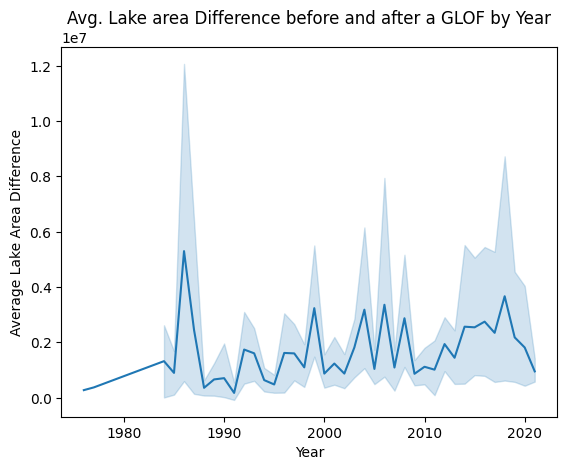

In [75]:
# Are the difference in lake area changing with time ?
sns.lineplot(data=df_with_lakeareas, x='Year', y='Lake_area_diff')
plt.ylabel('Average Lake Area Difference')
plt.title('Avg. Lake area Difference before and after a GLOF by Year')

In [76]:
df_with_lakeareas['Lake_diff_quote'] = df_with_lakeareas['Lake_area_after'] / df_with_lakeareas['Lake_area_before']

/var/folders/ft/35gzrsh14bd62d709j269hgr0000gn/T/ipykernel_97356/2395464053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_lakeareas['Lake_diff_quote'] = df_with_lakeareas['Lake_area_after'] / df_with_lakeareas['Lake_area_before']


**Comment:** The difference in Lake area before and after a GLOF does not appear to change that much with time, at least there is no clear trend. The effect a GLOF has on a lake stays constant. Measurements of lake area seems to have begun in the 1970s as those are our earliest observations then. A more suitable metric for this might be the quota between the lake area before and lake area after the GLOF since lakes can vary greatly in size.  

Text(0.5, 1.0, 'Lake Area Distribution (Before GLOF)')

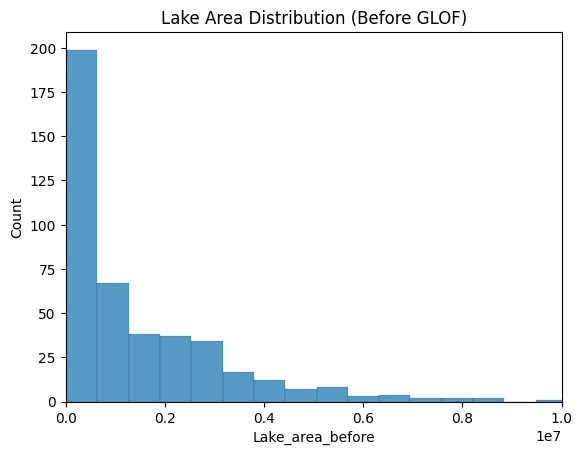

In [98]:
sns.histplot(data=df_with_lakeareas, x='Lake_area_before')
plt.xlim([0, 1e7])
plt.title('Lake Area Distribution (Before GLOF)')

**Comment:** The distribution of Lake Areas looks very heavy tailed, the quote between the lake area after and lake area before is probably a more suitable metric.

Text(0.5, 1.0, 'Distribution of the Quote between Lake Areas After and Before')

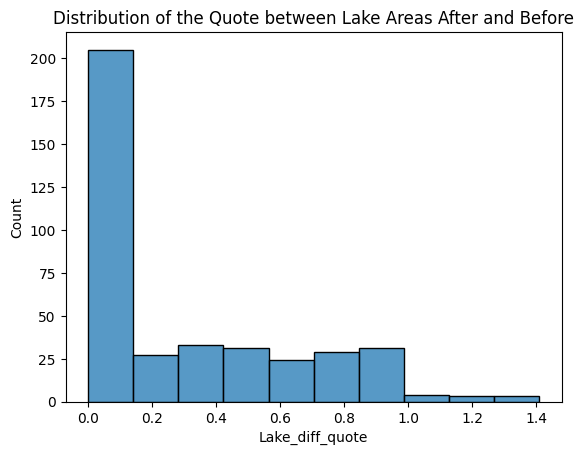

In [105]:
sns.histplot(data=df_with_lakeareas, x='Lake_diff_quote')
plt.title('Distribution of the Quote between Lake Areas After and Before')

**Comment:** It is interesting that 0 is common in the dataset for the quote. This is the case when the lake disappears after the GLOF.

Text(0.5, 1.0, 'Avg. Lake area Quote (before / after) a GLOF by Year')

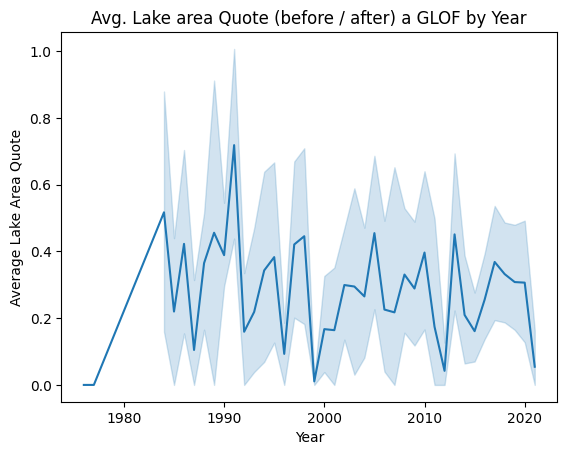

In [106]:
sns.lineplot(data=df_with_lakeareas, x='Year', y='Lake_diff_quote')
plt.ylabel('Average Lake Area Quote')
plt.title('Avg. Lake area Quote (before / after) a GLOF by Year')

**Comment:** We can see that the quote between lake area after and before does not appear to have changed that much with time.

In [14]:
glofs_per_year['yearly_increase'] = glofs_per_year.GLOFs.diff()

In [16]:
glofs_per_year['yearly_increase_percent'] = glofs_per_year.yearly_increase / glofs_per_year.GLOFs.shift(1)

In [18]:
glofs_per_year['yearly_increase_percent'].mean()

0.11848502309595087

In [22]:
glofs_per_year.tail(10).GLOFs.sum()

398